In [1]:
import pandas as pd
df = pd.read_csv("YelpChi.csv")
df

,date,reviewer_id,product_id,label,star_rating,review_text
0,6/8/2011,IFTr6_6NI4CgCVavIL9k5g,tQfLGoolUMu2J0igcWcoZg,N,5,Let me begin by saying that there are two kind...
1,8/30/2011,c_-hF15XgNhlyy_TqzmdaA,tQfLGoolUMu2J0igcWcoZg,N,3,The only place inside the Loop that you can st...
2,6/26/2009,CiwZ6S5ZizAFL5gypf8tLA,tQfLGoolUMu2J0igcWcoZg,N,5,I have walked by the Tokyo Hotel countless tim...
3,9/16/2010,nf3q2h-kSQoZK2jBY92FOg,tQfLGoolUMu2J0igcWcoZg,N,1,"If you are considering staying here, watch thi..."
4,2/5/2010,Sb3DJGdZ4Rq__CqxPbae-g,tQfLGoolUMu2J0igcWcoZg,N,3,"This place is disgusting, absolutely horrible,..."
...,...,...,...,...,...,...
67390,4/7/2012,fUXNHG4x1AN9oPpBSpCtUw,_KI0Y2UO68kJuTFUKucaXQ,N,5,I've passed this place a bunch of times on my ...
67391,6/5/2009,QQCm2oqSnnz24Z-yHeMtxQ,_KI0Y2UO68kJuTFUKucaXQ,N,4,Rubino's is not really setup as a retail opera...
67392,5/6/2012,OXRKydSyzC35n2fNUnbopg,XvP-kanjF6SpchosRk0N5g,N,5,This place is amazing. The food is great and y...
67393,1/8/2011,NE8ULc362aFvnkTDgvZbcA,XvP-kanjF6SpchosRk0N5g,N,2,OK went back the next day as I was driving by ...


In [2]:
df['text'] = df.review_text
df = df[['text', 'label']]
df

,text,label
0,Let me begin by saying that there are two kind...,N
1,The only place inside the Loop that you can st...,N
2,I have walked by the Tokyo Hotel countless tim...,N
3,"If you are considering staying here, watch thi...",N
4,"This place is disgusting, absolutely horrible,...",N
...,...,...
67390,I've passed this place a bunch of times on my ...,N
67391,Rubino's is not really setup as a retail opera...,N
67392,This place is amazing. The food is great and y...,N
67393,OK went back the next day as I was driving by ...,N


In [3]:
df.label = df.label.replace({
    'N': 0,
    'Y': 1
})
df

C:\Users\sri\AppData\Local\Temp\ipykernel_15848\2155139830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label = df.label.replace({


,text,label
0,Let me begin by saying that there are two kind...,0
1,The only place inside the Loop that you can st...,0
2,I have walked by the Tokyo Hotel countless tim...,0
3,"If you are considering staying here, watch thi...",0
4,"This place is disgusting, absolutely horrible,...",0
...,...,...
67390,I've passed this place a bunch of times on my ...,0
67391,Rubino's is not really setup as a retail opera...,0
67392,This place is amazing. The food is great and y...,0
67393,OK went back the next day as I was driving by ...,0


In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='label', ylabel='count'>

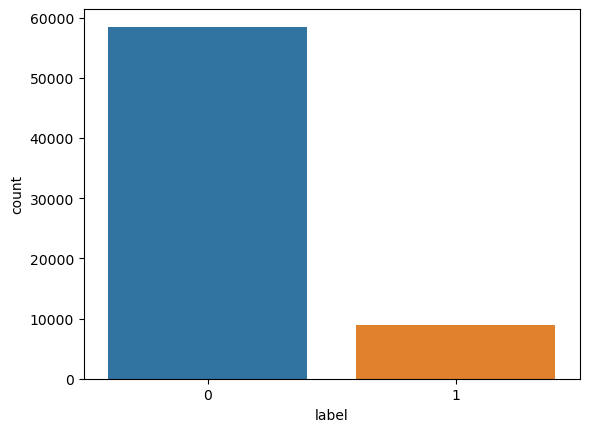

In [5]:
sn.countplot(x = df.label)

In [6]:
import nltk
import re
import string

def text_cleaning(text):
    """
    Preprocessing of text. 
    Lowercasing,
    remove links, 
    remove special characters,
    remove word containing numbers,
    """
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [7]:
df.text = df.text.apply(text_cleaning)
df

C:\Users\sri\AppData\Local\Temp\ipykernel_15848\4216237446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(text_cleaning)


,text,label
0,let me begin by saying that there are two kind...,0
1,the only place inside the loop that you can st...,0
2,i have walked by the tokyo hotel countless tim...,0
3,if you are considering staying here watch thi...,0
4,this place is disgusting absolutely horrible ...,0
...,...,...
67390,i ve passed this place a bunch of times on my ...,0
67391,rubino s is not really setup as a retail opera...,0
67392,this place is amazing the food is great and y...,0
67393,ok went back the next day as i was driving by ...,0


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def text_preprocessing(text):
    doc = nlp(text)
    tokens = set()
    for token in doc:
        if not token.is_stop:
            tokens.add(token.lemma_)
    return ' '.join(tokens)

In [ ]:
df.text = df.text.apply(text_preprocessing)
df

In [8]:
X = df.text
y = df.label

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X = v.fit_transform(X)
print(X.shape)

(67395, 60318)


In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
y.value_counts()

0    58476
1     8919
Name: label, dtype: int64

In [12]:
# Oversampling the minority class.
ros = RandomOverSampler(sampling_strategy = 1) 
y = y.astype('int')
X, y = ros.fit_resample(X, y)
y.value_counts()

0    58476
1    58476
Name: label, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 3,
                                                    test_size = 0.2
                                                   )

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

def print_results(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (5,4))
    sn.heatmap(cm, annot = True, fmt="d")
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     11754
           1       0.76      0.80      0.78     11637

    accuracy                           0.77     23391
   macro avg       0.77      0.77      0.77     23391
weighted avg       0.77      0.77      0.77     23391



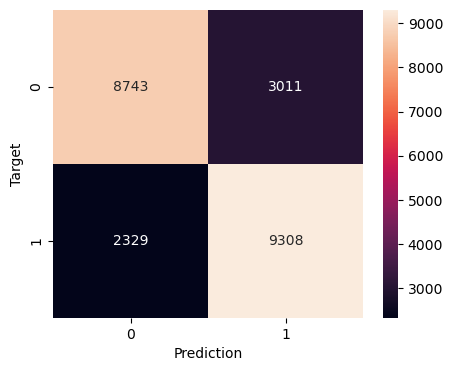

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_results(y_test, y_pred)